# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

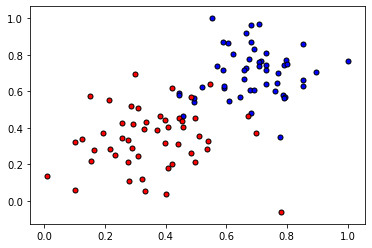

In [2]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

## Implementing without using numpy or math
- Formal definition of exp(x) using taylor series 
\begin{equation*}
{\displaystyle \exp x:=\sum _{k=0}^{\infty }{\frac {x^{k}}{k!}}=1+x+{\frac {x^{2}}{2}}+{\frac {x^{3}}{6}}+{\frac {x^{4}}{24}}+\cdots }
\end{equation*}
- Formal definition of ln(x) using taylor series 
\begin{equation*}
{\displaystyle \ln x:=\sum _{k=1}^{\infty }{(-1)^{k-1}}{\frac {(x-1)^{k}}{k}}}
\end{equation*}

In [160]:
import math
ks=[1]
def exp(x):
    xs=[1]
    exp_v=0
    exp_prev_v=x
    k=0
    while abs(exp_prev_v-exp_v) >0.0001:
        try:
            exp_prev_v=exp_v
            exp_v+=xs[k]/ks[k]
        except IndexError:
            xs.append(xs[k-1]*x)
            ks.append(ks[k-1]*k)
            exp_v+=xs[k]/ks[k]
        k+=1
    return exp_v
def ln(x):
    xs=[x-1]
    exp_v=0
    exp_prev_v=x
    k=1
    while abs(exp_prev_v-exp_v) >0.0001:
        try:
            exp_prev_v=exp_v
            one=(-1 if (k-1)%2 else 1)
            exp_v+=one*xs[k]/k
        except IndexError:
            xs.append(xs[k-1]*(x-1))
            exp_v+=one*xs[k]/k
        k+=1
    return exp_v
def my_sum(l1):
    s=0.0
    for n in l1:
        if n != math.inf and not math.isnan(n):
            s+=n 
    return s
def dot(l1,l2):
    return sum([i*j for (i, j) in zip(l1, l2)])
def compare(l1,number):
    return [x > number for x in l1]
def sca_plus(l1,number):
    return [a+number for a in l1]
def sca_mult(l1,number):
    return [a*number for a in l1]
def vect_mult(l1,l2):
    return [a*b for a,b in zip(l1,l2)]
def vect_plus(l1,l2):
    return [a+b for a,b in zip(l1,l2)]

In [169]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    try:
        return [1/(1+exp(-xi)) for xi in x]
    except:
        return 1/(1+exp(-x))
    #return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights)+bias)
    #return sigmoid(dot(features, weights) + bias)
    
# Error (log-loss) formula
def error_formula(y, output):
    try:
        return [-yi*ln(output_i)-(1-yi)*ln(1-output_i) for yi,output_i in zip(y, output)]
    except:
        return -y*ln(output)-(1-y)*ln(1-output)
    #return - y*np.log(output) - (1 - y) * np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    y_hat=output_formula(x, weights, bias)
    for i in range(len(weights)):
        weights[i]+=learnrate*(y-y_hat)*x[i]
    bias+=learnrate*(y-y_hat)
    return weights, bias

In [170]:
import math
x=2
print(math.log(x),ln(x))

0.6931471805599453 0.6930971830599583


In [171]:
print(sca_plus(vect_mult([1,2],[1,2,3]),1))

[2, 5]


## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [172]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss_a=error_formula(targets, out)
        loss=my_sum(loss_a)/len(loss_a)
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = compare(out,0.5)
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

C:\Users\ayman\Anaconda3\envs\normalenv\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in double_scalars
C:\Users\ayman\Anaconda3\envs\normalenv\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\ayman\Anaconda3\envs\normalenv\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
C:\Users\ayman\Anaconda3\envs\normalenv\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars



========== Epoch 0 ==========
Train loss:  -0.36772566724982325
Accuracy:  0.42

========== Epoch 10 ==========
Train loss:  -0.299723148042133   WARNING - Loss Increasing
Accuracy:  0.59


C:\Users\ayman\Anaconda3\envs\normalenv\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
C:\Users\ayman\Anaconda3\envs\normalenv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\ayman\Anaconda3\envs\normalenv\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app



========== Epoch 20 ==========
Train loss:  -0.2393143503188721   WARNING - Loss Increasing
Accuracy:  0.77

========== Epoch 30 ==========
Train loss:  -0.22343727411398576   WARNING - Loss Increasing
Accuracy:  0.71


C:\Users\ayman\Anaconda3\envs\normalenv\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply
C:\Users\ayman\Anaconda3\envs\normalenv\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app



========== Epoch 40 ==========
Train loss:  0.0   WARNING - Loss Increasing
Accuracy:  0.5

========== Epoch 50 ==========
Train loss:  0.0
Accuracy:  0.5

========== Epoch 60 ==========
Train loss:  0.0
Accuracy:  0.5

========== Epoch 70 ==========
Train loss:  0.0
Accuracy:  0.5

========== Epoch 80 ==========
Train loss:  0.0
Accuracy:  0.5

========== Epoch 90 ==========
Train loss:  0.0
Accuracy:  0.5


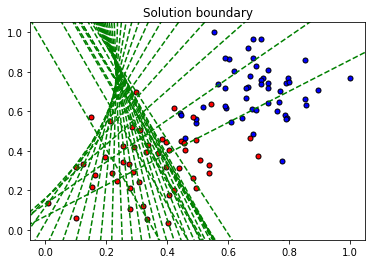

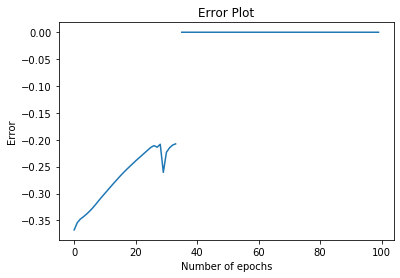

In [173]:
train(X, y, epochs, learnrate, True)